In [1]:
from transformers import RobertaTokenizer, RobertaConfig, RobertaModel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
input_sequence = "This article is about the online encyclopedia. For Wikipedia's home page, see Main Page. For the English edition, see English Wikipedia."
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
input_tokens = tokenizer(input_sequence, return_tensors="pt")

In [3]:
print(input_tokens)

{'input_ids': tensor([[    0,   713,  1566,    16,    59,     5,   804, 45975,     4,   286,
         28274,    18,   184,  1842,     6,   192,  4326,  7086,     4,   286,
             5,  2370,  5403,     6,   192,  2370, 28274,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])}


In [4]:
print(len(input_tokens["input_ids"]))
print(len(input_tokens))
print(len(input_sequence))
print(input_tokens["input_ids"].shape)

1
2
136
torch.Size([1, 29])


In [5]:
config = RobertaConfig.from_pretrained("roberta-base")
config

RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.5.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [6]:
model = RobertaModel.from_pretrained("roberta-base")
test_model = RobertaModel(config)

# print(model(tokenizer(input)))
print(input_tokens)
print(type(input_tokens))

{'input_ids': tensor([[    0,   713,  1566,    16,    59,     5,   804, 45975,     4,   286,
         28274,    18,   184,  1842,     6,   192,  4326,  7086,     4,   286,
             5,  2370,  5403,     6,   192,  2370, 28274,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])}
<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [7]:
output = model(**input_tokens)

In [8]:
last_hidden_state = output.last_hidden_state
print(last_hidden_state)
print(last_hidden_state.shape) # [batch_size, 문장길이, 단어벡터의 차원]
last_hidden_state_np = last_hidden_state.squeeze().detach().numpy()
print(last_hidden_state_np.shape)

tensor([[[-0.0687,  0.1148, -0.0107,  ..., -0.0608, -0.0302, -0.0069],
         [-0.0199,  0.3111,  0.1839,  ...,  0.2201,  0.1864,  0.1628],
         [-0.0253,  0.0368,  0.1066,  ..., -0.0771,  0.0607,  0.0478],
         ...,
         [-0.0151,  0.0967, -0.0219,  ...,  0.0838, -0.1042,  0.1099],
         [-0.0540,  0.1086, -0.0280,  ..., -0.0952, -0.0375, -0.0346],
         [ 0.0469,  0.1201,  0.0909,  ...,  0.0650, -0.0264,  0.0491]]],
       grad_fn=<NativeLayerNormBackward0>)
torch.Size([1, 29, 768])
(29, 768)


In [9]:
n_components=2
tsne = TSNE(n_components=n_components)

In [10]:
last_hidden_state_tsne = tsne.fit_transform(last_hidden_state_np)
print(last_hidden_state_tsne)

[[ 60.13737  -66.49202 ]
 [-23.78555   61.197   ]
 [ 42.947674  47.13421 ]
 [-57.86938    2.018987]
 [-58.45608   41.1023  ]
 [ 10.870665 -12.75909 ]
 [-46.462402 -34.00601 ]
 [-96.02212   13.779788]
 [ 58.498142  84.57026 ]
 [ 17.559822 -86.43832 ]
 [ 49.27218  -20.552435]
 [-11.44949  -44.95708 ]
 [ 66.171776  13.933795]
 [ 22.096165 107.00733 ]
 [-25.392677 -81.5787  ]
 [ 86.99247  -32.03656 ]
 [-66.6052   -67.91969 ]
 [-20.170708 102.14712 ]
 [ 85.839386  51.602818]
 [ 12.608202  68.12313 ]
 [ 24.45339  -47.363754]
 [-58.54001   84.677246]
 [  4.424034  31.952826]
 [-94.31663   57.85573 ]
 [-88.88827  -28.449726]
 [104.73845    8.87993 ]
 [ 30.97722   12.951329]
 [-27.280298  24.628685]
 [-20.83812   -7.542474]]


AttributeError: 'AxesSubplot' object has no attribute 'show'

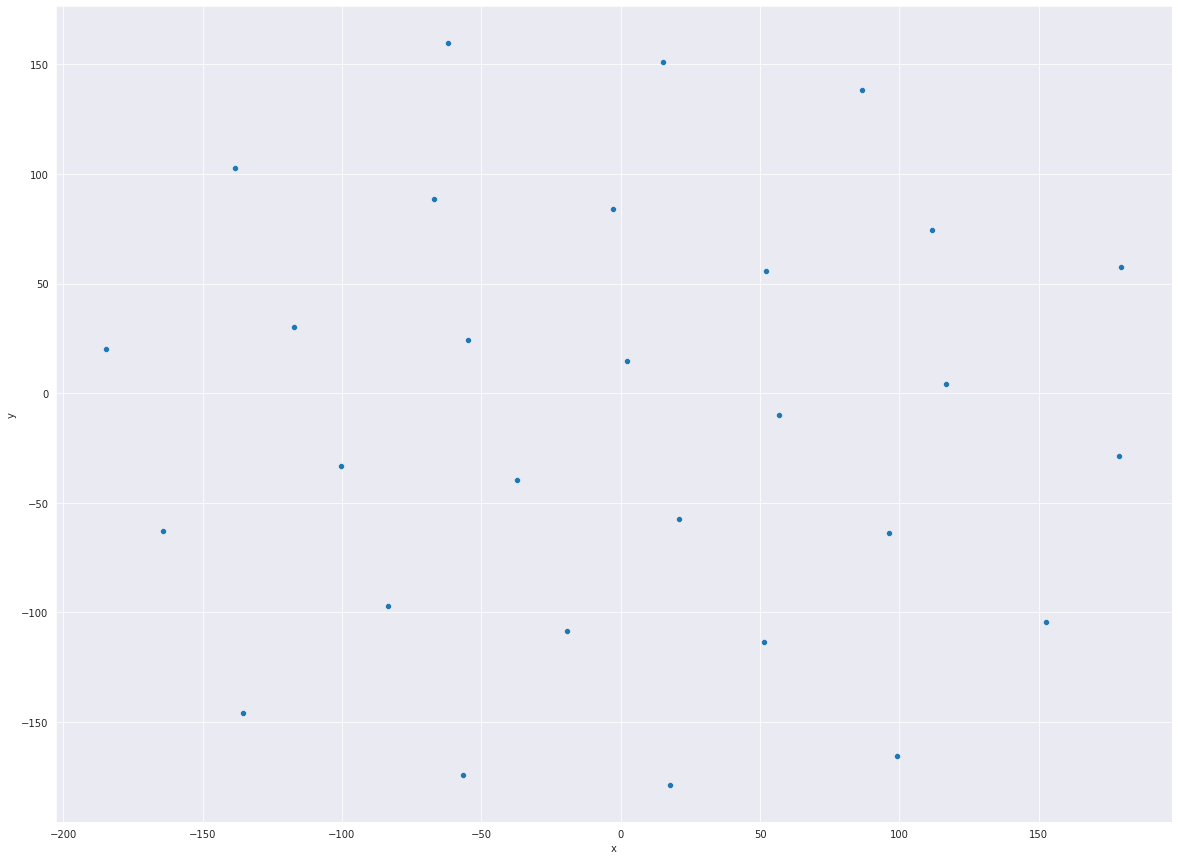

In [11]:
import seaborn as sns

n_components=2
tsne = TSNE(n_components=n_components)


model = TSNE(n_components= 2,init='pca',perplexity=40)
embed = pd.DataFrame(model.fit_transform(last_hidden_state_np), columns=['x', 'y'])

plt.figure(figsize=(20, 15))
fig = sns.scatterplot(data = embed, x='x',y="y")
fig.show()